### Model Visualization

In [ ]:
# Imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from IPython.core.display import display, HTML, Image

# Set project root
PROJ_ROOT = os.pardir
sys.path.append(PROJ_ROOT)
from src.features.tree import Tree
from src.models.data_manager import DataManager
from src.models.rntn import RNTN
from src.models.predict_model import predict_model

We look at some of the reviews from the test set, to examine how the trained model makes predictions.

#### Example: Positive Sentiment

This is an example, where the positive sentiment from the left subtree dominates the right subtree sentiment.

In [ ]:
def build_str(txt):
    return     \
        '<html><body><h3>Sentiment tree:</h3> \
        <canvas id="treeCanvas" width="800" height="800" style="border:1px solid #000000;"></canvas> \
        <script type=text/javascript src="../src/webapp/static/tree.js"></script> \
        <script type="text/javascript"> \
            draw_tree(\'' + txt + '\', 800, 800); \
        </script></body></html>'

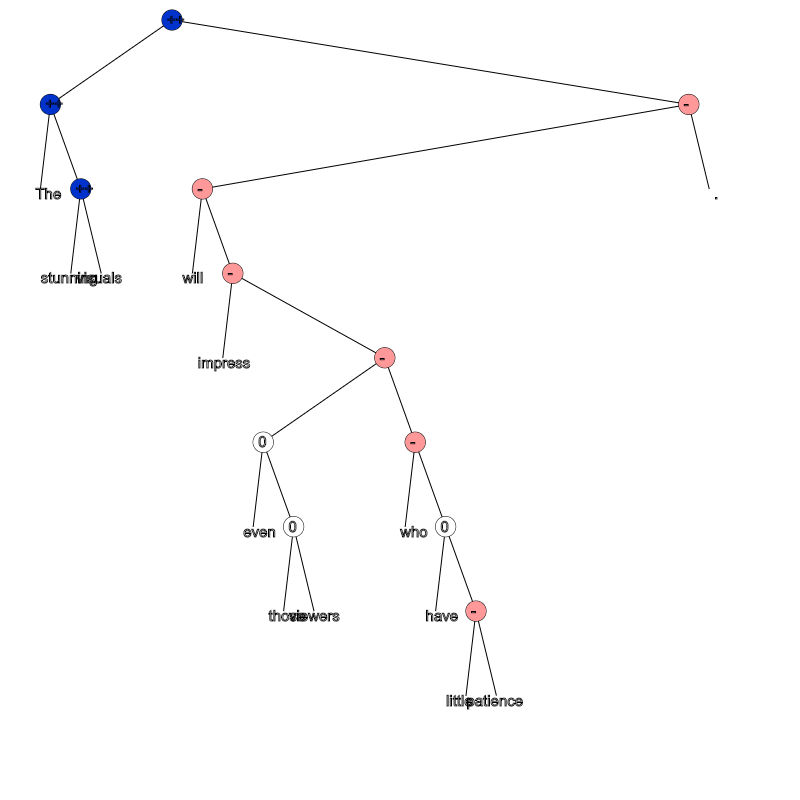

In [52]:
pos_txt = 'The stunning visuals will impress even those viewers who have little patience.'
#y, predict_txt = predict_model(pos_txt)
#pos_display_txt = build_str(str(predict_txt))
# display(HTML(pos_display_txt))
display(Image(filename='../docs/pos_sent_Visualizations.png'))

As seen with this example, the statement is overall very positive even though a part of the sentence is negative.

#### Example: Negative Sentiment

A great example, where the partial phrase expresses positive sentiment (more original), but the sentence is correctly classified as negative.

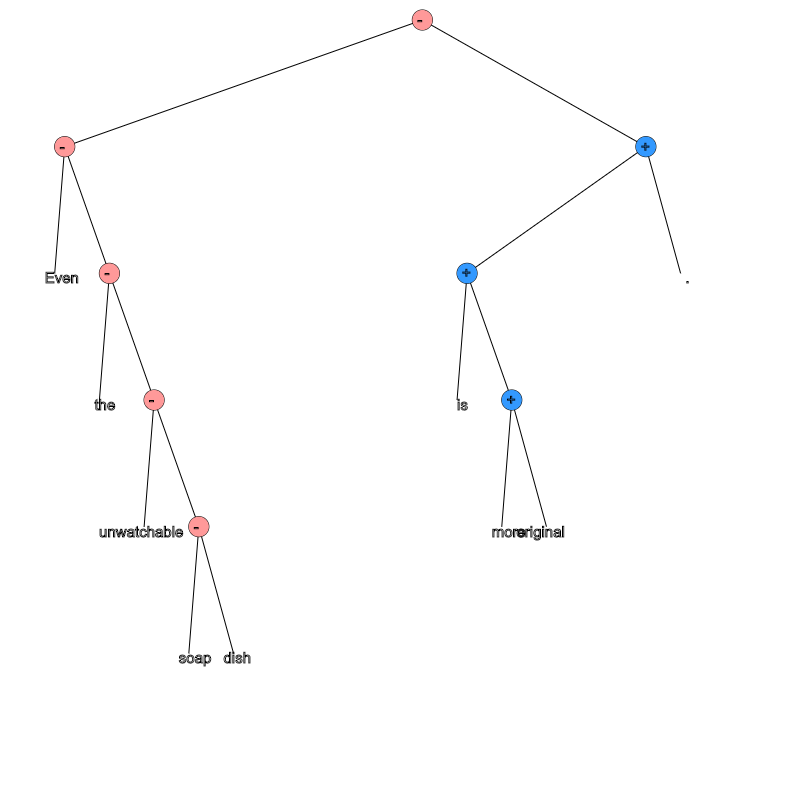

In [67]:
pos_txt = "Even the unwatchable soap dish is more original."
# y, predict_txt = predict_model(pos_txt)
# pos_display_txt = build_str(str(predict_txt))
# display(HTML(pos_display_txt))
display(Image(filename='../docs/neg_sen_Visualizations.png'))

#### Example: Neutral Sentiment

This sentence expresses no opinion and is correctly classified as neutral.

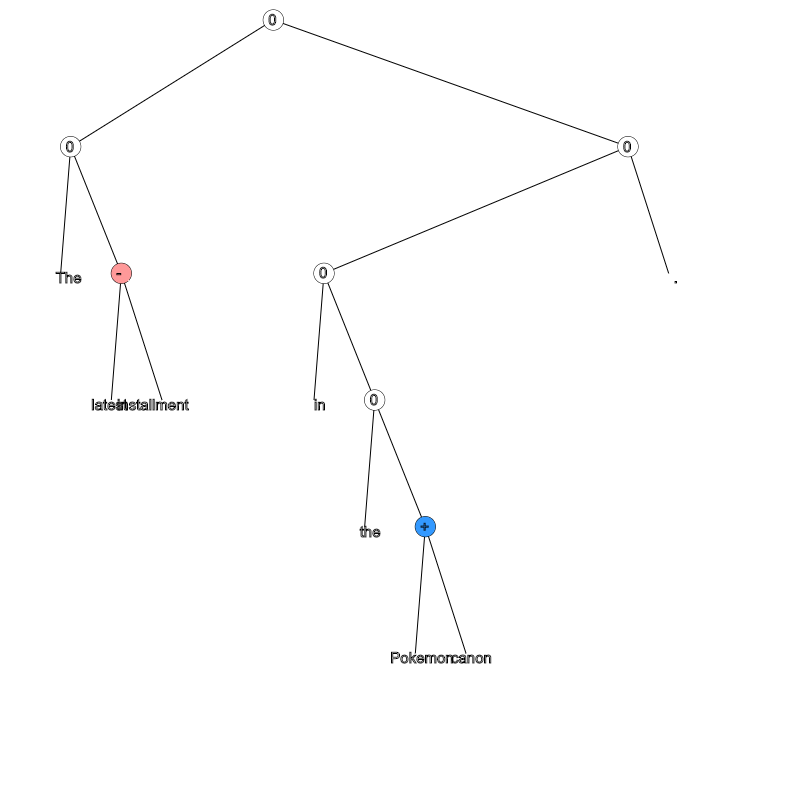

In [82]:
pos_txt = 'The latest installment in the Pokemon canon.'
# y, predict_txt = predict_model(pos_txt)
# pos_display_txt = build_str(str(predict_txt))
# display(HTML(pos_display_txt))
display(Image(filename='../docs/neutral_sen_Visualizations.png'))

#### Example: No Sentiment Words

This is a great example of sentiment prediction, even when there are no sentiment words!

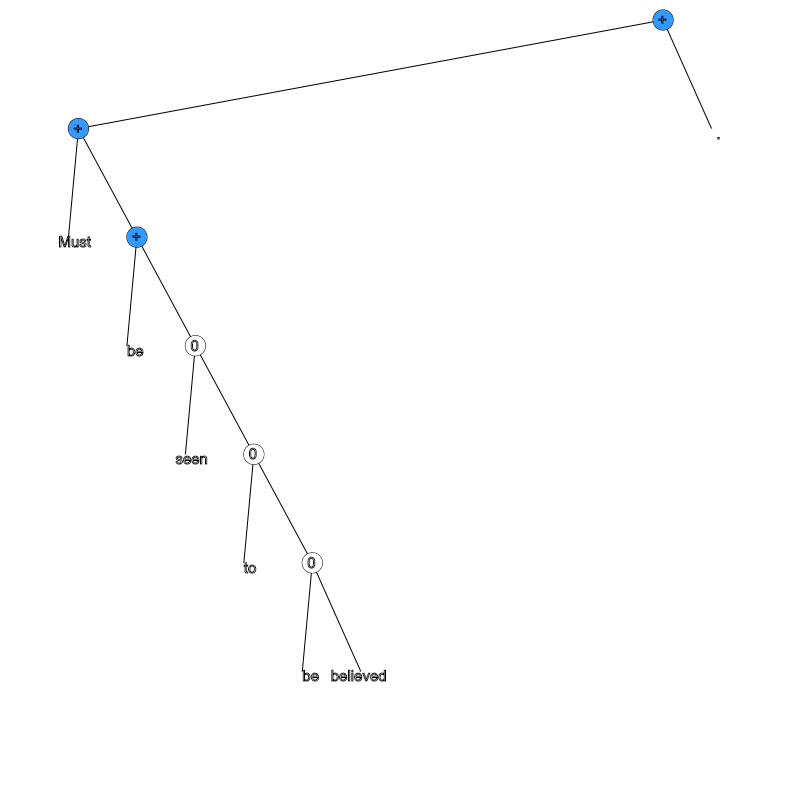

In [63]:
pos_txt = 'Must be seen to be believed.'
# y, predict_txt = predict_model(pos_txt)
# pos_display_txt = build_str(str(predict_txt))
# display(HTML(pos_display_txt))
display(Image(filename='../docs/no_sen_Visualizations.png'))

#### Example: Mixed Sentiments

This example shows how mixed sentiments are expressed in a parse tree, the left subtree is slightly positive, while the right subtree changes the its sentiment due to strong effect of 'badly'.

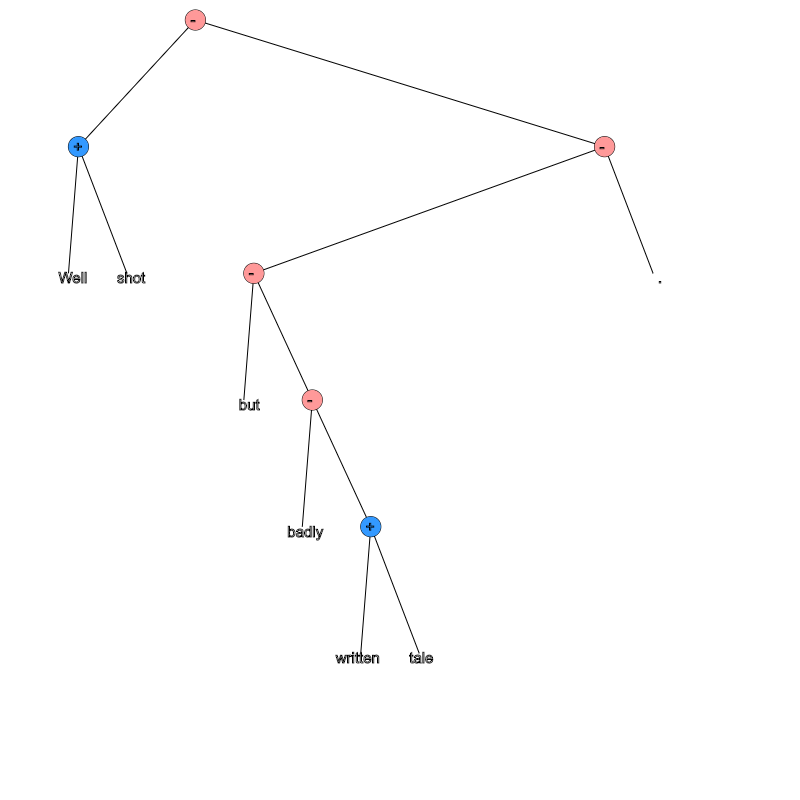

In [84]:
pos_txt = "Well shot but badly written tale."
# y, predict_txt = predict_model(pos_txt)
# pos_display_txt = build_str(str(predict_txt))
# display(HTML(pos_display_txt))
display(Image(filename='../docs/mixed_sen_Visualizations.png'))

#### Example: Sentence Negation

This example shows strong effect of the word 'not' in flipping the sentiment.

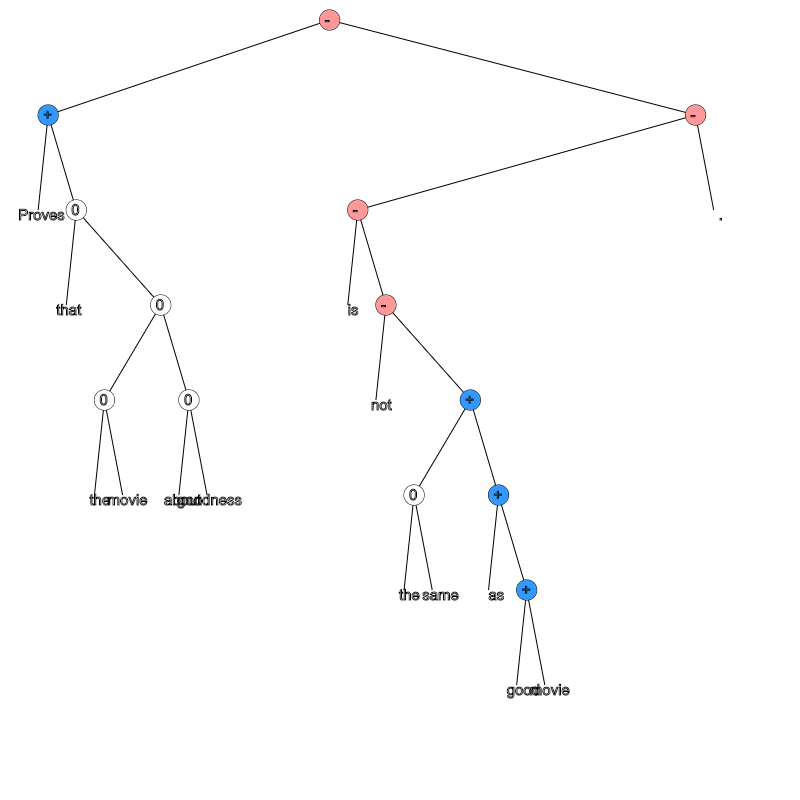

In [54]:
pos_txt = "Proves that the movie about goodness is not the same as good movie."
# y, predict_txt = predict_model(pos_txt)
# pos_display_txt = build_str(str(predict_txt))
# display(HTML(pos_display_txt))
display(Image(filename='../docs/sen_neg_Visualizations.png'))

#### Sentence Orientation flip

Here, we see strong effect of the word 'but' in flipping the overall sentiment.

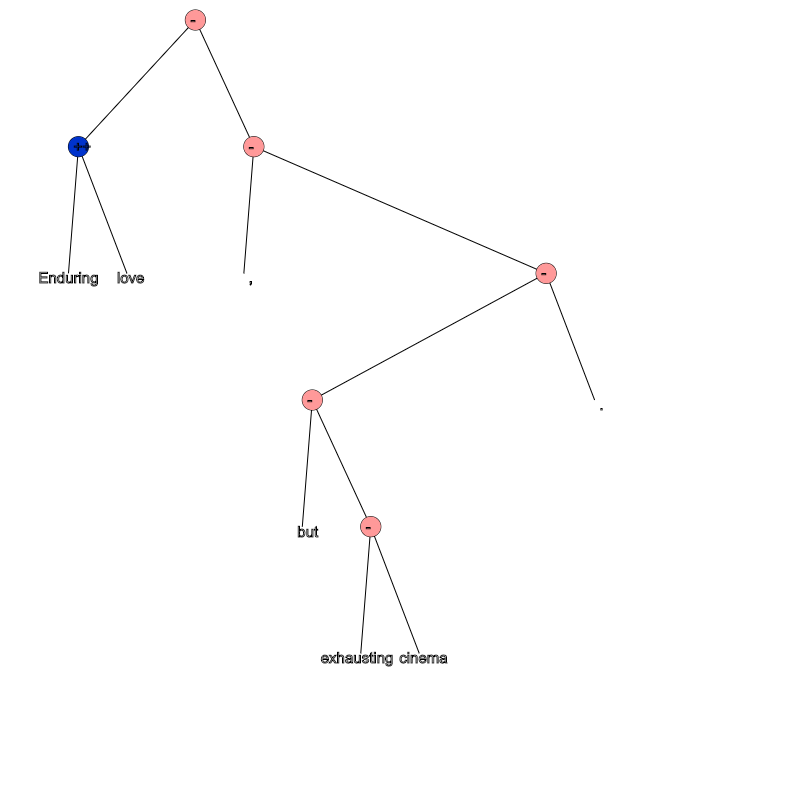

In [61]:
pos_txt = "Enduring love, but exhausting cinema."
# y, predict_txt = predict_model(pos_txt)
# pos_display_txt = build_str(str(predict_txt))
# display(HTML(pos_display_txt))
display(Image(filename='../docs/sen_flip_Visualizations.png'))

#### Similar Words: t-SNE Visualization

One way of validating the generated word vectors is to look at how close they are to each other. Since the word-embeddings in the trained model live in high-dimensional space, these have to be mapped to 2-D space for visualization. t-SNE (t-Stochastic Neighbor Embedding) allows for reducing the vector to 2-D space. 

We look at a few randomly chosen words from each class and see how close these are in 2-D space.

In [86]:
# Load word embeddings from the model
model_name = 'RNTN_30_tanh_35_5_None_50_0.001_0.01_9645'

# Load model
rntn_model = RNTN(model_name=model_name)
L, vocab = rntn_model.get_word_embeddings()

In [96]:
# Choose words from each class
pos_words = ['charming', 'playful', 'astonishing', 'fun', 'pure']
neg_words = ['disappoints', 'downer', 'trash', 'artless', 'flawed']
neutral_words = ['acting', 'story', 'elements', 'catharsis', 'moment']

pos_idx = [vocab[i] for i in pos_words]
neg_idx = [vocab[i] for i in neg_words]
neutral_idx = [vocab[i] for i in neutral_words]

In [88]:
# Generate 2-d word embeddings
tsne_model = TSNE()
tsne_embeddings = tsne_model.fit_transform(np.transpose(L))
x = tsne_embeddings[:, 0]
y = tsne_embeddings[:, 1]

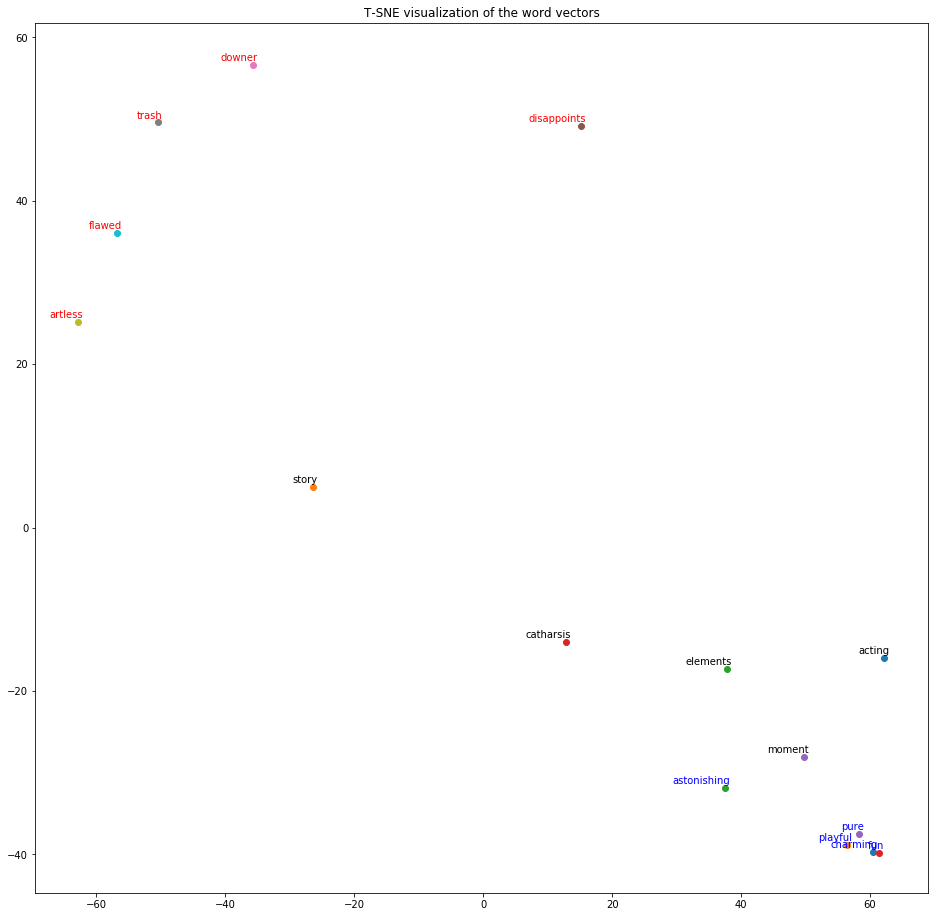

In [105]:
# Show the embeddings
plt.figure(figsize=(16, 16)) 
for i in range(5):
    idx = pos_idx[i]
    plt.scatter(x[idx],y[idx])
    plt.annotate(pos_words[i],
                 xy=(x[idx], y[idx]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom', color='blue', label='positive')

for i in range(5):
    idx = neg_idx[i]
    plt.scatter(x[idx],y[idx])
    plt.annotate(neg_words[i],
                 xy=(x[idx], y[idx]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom', color='red', label='negative')

for i in range(5):
    idx = neutral_idx[i]
    plt.scatter(x[idx],y[idx])
    plt.annotate(neutral_words[i],
                 xy=(x[idx], y[idx]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom', label='neutral')

plt.title('T-SNE visualization of the word vectors')
plt.show()

We see three distinct clusters, one for each of the three groups. The blue cluster represents the positive words, the red cluster the negative words and the black cluster represents neutral sentiment.